# andes14 base - trip Gen

In [7]:
import andes
import os

# andes and pandapower version
print(f'Andes version: {andes.__version__}')

Andes version: 1.6.2


In [8]:
# get andes case from excel
dir_path = os.path.abspath('..')
case_path = '/Test_ieee14_base/ieee14_base.xlsx'
case = dir_path + case_path
ssa = andes.load(case,
                 setup=False,
                 no_output=True,
                 default_config=False)

Line: unused data {'rate_a': 200}
Line: unused data {'rate_a': 100}
Line: unused data {'rate_a': 100}
Line: unused data {'rate_a': 100}
Line: unused data {'rate_a': 100}
Line: unused data {'rate_a': 50}
Line: unused data {'rate_a': 100}
Line: unused data {'rate_a': 50}
Line: unused data {'rate_a': 50}
Line: unused data {'rate_a': 100}
Line: unused data {'rate_a': 50}
Line: unused data {'rate_a': 20}
Line: unused data {'rate_a': 50}
Line: unused data {'rate_a': 50}
Line: unused data {'rate_a': 50}
Line: unused data {'rate_a': 20}
Line: unused data {'rate_a': 20}
Line: unused data {'rate_a': 20}
Line: unused data {'rate_a': 20}
Line: unused data {'rate_a': 20}


In [9]:
# Add a Toggler that disconnects `GENROU_2` at t=1 s
ssa.add("Toggler", dict(model='SynGen', dev="GENROU_2", t=1.0))

ssa.setup()

ssa.Toggler.as_df()

,idx,u,name,model,dev,t
uid,,,,,,
0,1,0.0,Toggler_1,Line,Line_1,1.0
1,2,0.0,Toggler_2,Line,Line_1,1.1
2,Toggler_3,1.0,Toggler_3,SynGen,GENROU_2,1.0


In [10]:
# set load as constant load
ssa.PQ.config.p2p = 1
ssa.PQ.config.q2q = 1
ssa.PQ.config.p2z = 0
ssa.PQ.config.q2z = 0
ssa.PQ.pq2z = 0

# Turn on numba to accelerate TDS
ssa.config.numba

# set sim time
ssa.TDS.config.tf = 20

ssa.PFlow.run()

True

In [11]:
ssa.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

<Toggler Toggler_3>: SynGen.GENROU_2 status changed to 0 at t=1.0 sec.


True

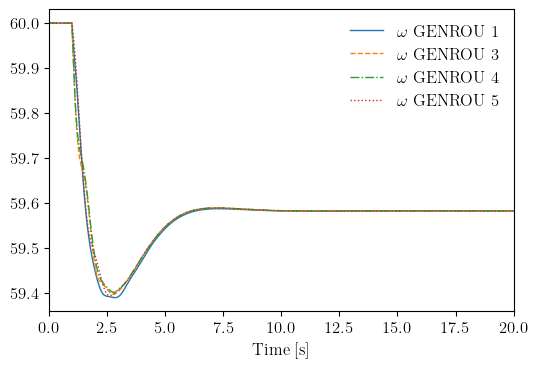

(<Figure size 600x400 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [12]:
ssa.TDS.load_plotter()

ssa.TDS.plt.plot(ssa.GENROU.omega,
                a=(0, 2, 3, 4),
                ytimes=60,
               )